# Setup

In [1]:
#Connecting google drive to Colab to import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
path = "/content/drive/MyDrive/Barcelona/Barcelona.listings.csv"
df = pd.read_csv(path)

#Data Cleaning

##Verify Data

In [4]:
#Check the size of data (Rows,columns)
#Total number of listings in Barcelona
df.shape

(17230, 75)

In [5]:
#To display all the columns
pd.set_option('display.max_columns', None)
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,95%,93%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,46.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Refrigerator"", ""Hangers"", ""Wifi"", ""30\"" TV"",...",$210.00,1,1125,1.0,5.0,1125.0,1125.0,2.8,1125.0,NaN,t,0,0,14,18,2023-06-10,35,8,0,2013-05-27,2023-04-07,4.35,4.44,4.65,4.79,4.71,4.82,4.32,HUTB-002062,t,28,28,0,0,0.29
1,23197,https://www.airbnb.com/rooms/23197,20230610001920,2023-06-10,city scrape,Rental unit in Sant Adria de Besos · ★4.77 · 3...,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi there, I'm marnie from Australia, though I ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/44b56...,https://a0.muscache.com/im/pictures/user/44b56...,El Besòs i el Maresme,6.0,9.0,"['email', 'phone']",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.412907,2.220633,Entire rental unit,Entire home/apt,5,NaN,2 baths,3.0,4.0,"[""Fire extinguisher"", ""Oven"", ""Refrigerator"", ...",$250.00,4,300,4.0,7.0,1125.0,1125.0,4.6,1125.0,NaN,t,8,15,39,185,2023-06-10,72,13,2,2011-03-15,2023-05-29,4.77,4.93,4.88,4.94,4.99,4.61,4.63,HUTB005057,f,2,2,0,0,0.48


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17230 non-null  int64  
 1   listing_url                                   17230 non-null  object 
 2   scrape_id                                     17230 non-null  int64  
 3   last_scraped                                  17230 non-null  object 
 4   source                                        17230 non-null  object 
 5   name                                          17230 non-null  object 
 6   description                                   17120 non-null  object 
 7   neighborhood_overview                         9879 non-null   object 
 8   picture_url                                   17230 non-null  object 
 9   host_id                                       17230 non-null 

In [7]:
#Check missing values for all the columns before dropping
for column in df.columns:
  if df[column].isna().sum()>0:

    print(f"{column:-<50} : {df[column].isna().sum()}")


description--------------------------------------- : 110
neighborhood_overview----------------------------- : 7351
host_name----------------------------------------- : 2
host_since---------------------------------------- : 2
host_location------------------------------------- : 3852
host_about---------------------------------------- : 6228
host_response_time-------------------------------- : 3006
host_response_rate-------------------------------- : 3006
host_acceptance_rate------------------------------ : 2758
host_is_superhost--------------------------------- : 6042
host_thumbnail_url-------------------------------- : 2
host_picture_url---------------------------------- : 2
host_neighbourhood-------------------------------- : 7759
host_listings_count------------------------------- : 2
host_total_listings_count------------------------- : 2
host_has_profile_pic------------------------------ : 2
host_identity_verified---------------------------- : 2
neighbourhood--------------------------

##Filter the data by accommodates
###Assumption:Filter the data based on <= 2 accommodates suitable for digital nomads

In [8]:
#Use loc() for label indexing [Row, column]
df=df.loc[df.accommodates<3,:]

In [9]:
df.shape

(8117, 75)

In [10]:
#Use Count() to count unique values in 'accommodates'
df.accommodates.value_counts()

2    5604
1    2512
0       1
Name: accommodates, dtype: int64

In [11]:
#Looks like there is an error as there is a listing which accommodates 0 people
#Lets locate the entry using loc()
df.loc[df.accommodates==0]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9254,44345400,https://www.airbnb.com/rooms/44345400,20230610001920,2023-06-10,previous scrape,Aparthotel in Barcelona · Studio,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,357768035,https://www.airbnb.com/users/show/357768035,Citadines Ramblas,2020-07-22,"Barcelona, Spain",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/2bc61...,https://a0.muscache.com/im/pictures/user/2bc61...,NaN,4.0,5.0,"['email', 'phone']",t,t,NaN,el Barri Gòtic,Ciutat Vella,41.38382,2.17146,Room in aparthotel,Hotel room,0,NaN,NaN,NaN,NaN,"[""Fire extinguisher"", ""Pets allowed"", ""Refrige...",$0.00,1,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0,0,0,0,2023-06-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


In [12]:
#Looks like the above listing is indeed an error
#Lets drop that entry using drop() & Boolean indexing technique
df=df.drop(df[df['accommodates']==0].index)
df.accommodates.value_counts()

2    5604
1    2512
Name: accommodates, dtype: int64

##Create 'df1' with relevant columns
### Drop irrelvant listings

In [13]:
#Create new dataframe keeping only required columns
df1=df[['id','listing_url','name','host_since','host_is_superhost','neighbourhood_group_cleansed','accommodates','amenities','price','number_of_reviews','review_scores_rating','latitude','longitude']]

In [14]:
#Check columns that we have
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

####Drop all listings with no review_scores_rating

In [15]:
#Drop all listings with review_scores_rating is nill and number_of_reviews=0
df1.review_scores_rating.value_counts(dropna=False)
df1.dropna(subset=['review_scores_rating'],inplace=True)

<ipython-input-15-9eebd8b0557d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['review_scores_rating'],inplace=True)


In [16]:
df1.shape

(5794, 13)

####Drop listings with abnormal pricing

In [17]:
df1.price.describe

<bound method NDFrame.describe of 4         $63.00
7         $30.00
8        $200.00
12       $186.00
14        $32.00
          ...   
17060     $82.00
17063     $91.00
17074    $300.00
17104     $89.00
17149     $76.00
Name: price, Length: 5794, dtype: object>

In [18]:
#Convert price from object to int/float and
#also remove $ and Commas
df1.price=df1.price.str.replace('$','').str.replace(',','').astype(float)

<ipython-input-18-4d5ced287eb1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.price=df1.price.str.replace('$','').str.replace(',','').astype(float)
<ipython-input-18-4d5ced287eb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.price=df1.price.str.replace('$','').str.replace(',','').astype(float)


In [19]:
#Price is changed from object to float
df1.price.dtypes

dtype('float64')

In [20]:
#Check all the listings with pricee above 1000
df1[df1['price']>1500].shape

(13, 13)

In [21]:
#There are a total 13 listings with wrong price or unavailable
#After verifying each listing url, dropping all 13 to avoid skewness in the price and alter dataframe
df1=df1[df1['price']<=1500]

In [22]:
df1.shape

(5781, 13)

#Listings
####Listings in the original dataset=17230
####After filtering by accommodates=8117
####After dropping listings with no reviews=5794
####After dropping abnormal listings=5781 (Final Dataset)



# Data manipulation

In [23]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

###host_since

In [24]:
#Lets check what type of info we have
#Info gives details of each column's datatype like int, float, or string
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 4 to 17149
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5781 non-null   int64  
 1   listing_url                   5781 non-null   object 
 2   name                          5781 non-null   object 
 3   host_since                    5780 non-null   object 
 4   host_is_superhost             2205 non-null   object 
 5   neighbourhood_group_cleansed  5781 non-null   object 
 6   accommodates                  5781 non-null   int64  
 7   amenities                     5781 non-null   object 
 8   price                         5781 non-null   float64
 9   number_of_reviews             5781 non-null   int64  
 10  review_scores_rating          5781 non-null   float64
 11  latitude                      5781 non-null   float64
 12  longitude                     5781 non-null   float64
dtypes:

In [25]:
#Lets find the experince of host
df1.host_since

4        2010-03-09
7        2010-07-05
8        2011-01-09
12       2011-01-28
14       2011-03-14
            ...    
17060    2018-04-23
17063    2019-08-20
17074    2022-10-04
17104    2019-08-27
17149    2023-04-25
Name: host_since, Length: 5781, dtype: object

In [26]:
# Lets change the datatype from object to datetime
from datetime import datetime as dt
df1.host_since=pd.to_datetime(df1.host_since)
df1.host_since.dt.year


4        2010.0
7        2010.0
8        2011.0
12       2011.0
14       2011.0
          ...  
17060    2018.0
17063    2019.0
17074    2022.0
17104    2019.0
17149    2023.0
Name: host_since, Length: 5781, dtype: float64

In [27]:
#Now datetype is changed to float
#Create new column to verify no:of years of experience
df1['host_exp']=dt.today().year-df1.host_since.dt.year
df1.host_exp

4        13.0
7        13.0
8        12.0
12       12.0
14       12.0
         ... 
17060     5.0
17063     4.0
17074     1.0
17104     4.0
17149     0.0
Name: host_exp, Length: 5781, dtype: float64

In [28]:
#Verify if new column is added to the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 4 to 17149
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5781 non-null   int64         
 1   listing_url                   5781 non-null   object        
 2   name                          5781 non-null   object        
 3   host_since                    5780 non-null   datetime64[ns]
 4   host_is_superhost             2205 non-null   object        
 5   neighbourhood_group_cleansed  5781 non-null   object        
 6   accommodates                  5781 non-null   int64         
 7   amenities                     5781 non-null   object        
 8   price                         5781 non-null   float64       
 9   number_of_reviews             5781 non-null   int64         
 10  review_scores_rating          5781 non-null   float64       
 11  latitude                     

##host_is_superhost

In [29]:
df1.isna().sum()

id                                 0
listing_url                        0
name                               0
host_since                         1
host_is_superhost               3576
neighbourhood_group_cleansed       0
accommodates                       0
amenities                          0
price                              0
number_of_reviews                  0
review_scores_rating               0
latitude                           0
longitude                          0
host_exp                           1
dtype: int64

In [30]:
#check unique values in this column including missing values
df1.host_is_superhost.value_counts(dropna=False)

NaN    3576
f      1639
t       566
Name: host_is_superhost, dtype: int64

In [31]:
#Since there are lot of missing values in this column
#Lets assume missing values as f
df1.host_is_superhost.fillna("f",inplace=True)

In [32]:
df1.host_is_superhost.value_counts()

f    5215
t     566
Name: host_is_superhost, dtype: int64

In [33]:
#Alter f or t (strings) to 0 or 1 (integers)
df1['host_is_superhost']=df1.host_is_superhost.replace({'f':0, 't':1})

In [34]:
df1.host_is_superhost.value_counts()

0    5215
1     566
Name: host_is_superhost, dtype: int64

##price

In [35]:
#Now price is displayed as float
df1.price.describe()

count    5781.000000
mean       87.192873
std        77.095184
min         8.000000
25%        40.000000
50%        63.000000
75%       105.000000
max      1485.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

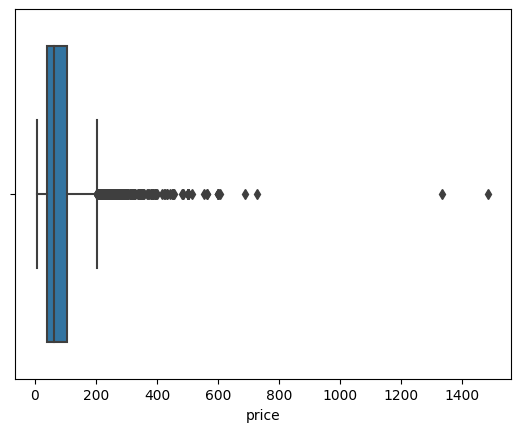

In [36]:
#plot outliers using boxplot
sns.boxplot(data=df1,x='price')

In [37]:
# Identify outliers using interquartile range.
#calculate IQR for 'price' column
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df1[(df1['price'] < Q1 - threshold * IQR) | (df1['price'] > Q3 + threshold * IQR)]

In [38]:
print( Q1 - threshold * IQR,Q3 + threshold * IQR)

-57.5 202.5


This is just for our reference, we are not deleting outliers based on boxplot!

<Axes: xlabel='price', ylabel='Count'>

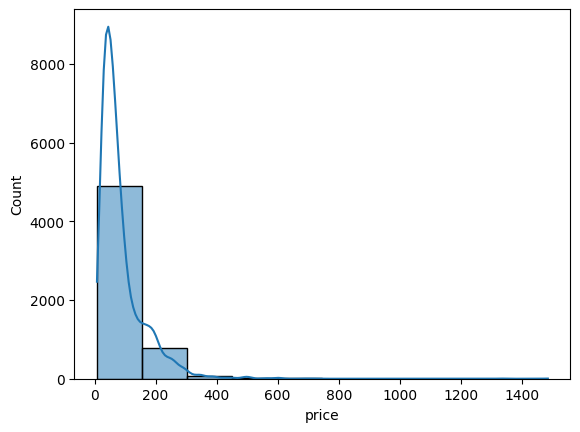

In [39]:
sns.histplot(data=df1.price, bins=10, kde=True)

In [40]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(df,column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

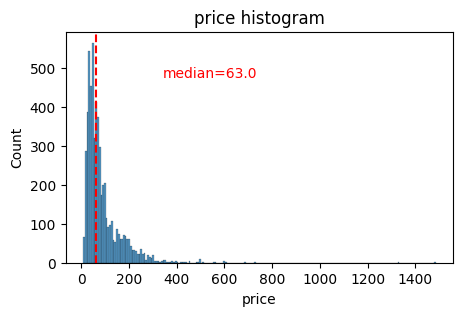

In [41]:
histogrammer(df1,'price', median_text=True)

##Amenities

In [42]:
#Create new column for wifi
df1['wifi']=(df1.amenities.str.contains('Wifi', case=False))

In [43]:
df1['wifi'].sum()/df1.shape[0]

0.9769935997232313

In [44]:
#Create new column for workspace
df1['workspace']=(df1.amenities.str.contains('workspace', case=False))
df1['workspace'].sum()/df1.shape[0]

0.39456841376924406

##Coworking Place Data

In [45]:
path = "/content/drive/MyDrive/Barcelona/modified_coordinates.csv"
cwp = pd.read_csv(path)

In [46]:
cwp.sample(5)
#Dataset includes data for all the cities

,city,name,adress,Google Plus-Code,longitude,latitude
153,Barcelona,MOB Caterina - Coworking in Barcelona,"Av. de Francesc Cambó, 17, 1er piso, 08003 Bar...","95PG+FX Barcelona, Spanien",4138622,2177492
104,Riga,Teikums,"Gustava Zemgala gat. 78, Vidzemes priekšpilsēt...","X5G8+QF Riga, Lettland",5697692,2416626
126,Barcelona,Coworking RavalCo - Peaceful Coworking (24/7 f...,"C/ de Sant Vicenç, 21, 08001 Barcelona, Spanien","95J7+FX Barcelona, Spanien",4138122,2164982
14,Lisbon,DeBru Craft Beer,"R. Luciano Cordeiro 2C, 1150-313 Lisboa, Portugal","PVF4+9X Lissabon, Portugal",3872346,-914253
196,Barcelona,Coworking Loft para Creativos: WeLoft,"C/ de Pere IV, 78, 6º 2ª, 08005 Barcelona, Spa...","95WV+VF Barcelona, Spanien",4139716,2193665


In [47]:
# lets Filter cwp data for Barcelona and rename as cwp_bar
# and Drop useless columns
# and Set index with name column
cwp_bar=cwp[cwp.city=='Barcelona'].drop(['city', 'Google Plus-Code', 'adress'], axis=1).set_index('name')

In [48]:
cwp_bar

,longitude,latitude
name,,
La Vaca Coworking Barcelona,4137409,2161937
OneCoWork Catedral | Barcelona Coworking,4138499,2176744
"betahaus I - Coworking in Barcelona, Gràcia",4140696,2156778
Meet BCN - Coworking Space in Barcelona,4139482,2157991
Barcelona Reial Coworking,4137942,2175059
...,...,...
Coworking Poblenou,4139419,2188538
Acla Coworking,4139832,2167709
Beauty Loft Coworking,4140338,2160729


In [49]:
cwp_bar.longitude.dtype

dtype('int64')

In [50]:
# Adjust longitude and latitude in valid format
cwp_bar.longitude=cwp_bar.longitude/100000
cwp_bar.latitude=cwp_bar.latitude/1000000

In [51]:
# Create a dictionnary dict_cwp for easy iteration
dict_cwp={cwp_bar.index.tolist()[i] :(cwp_bar.longitude.tolist()[i],cwp_bar.latitude.tolist()[i]) for i in range(len(cwp_bar.index.tolist()))}

In [52]:
'''Import functions for calculating distance from each listing to coworkingspace'''

'Import functions for calculating distance from each listing to coworkingspace'

In [53]:
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance used for calculation between our dataset entries and coworking places.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [54]:
def get_minimal_distance_from_coworking_place(l,L):
    """
    Get the minimal distance from co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv
    l for longitude
    L for latitude
    Result in km rounded with 3 digits
    """
    origin=(l,L)
    min_dist=""
    for cwp in dict_cwp:
        if min_dist=="":
            min_dist=distance(origin, dict_cwp[cwp])
            continue
        if min_dist<distance(origin, dict_cwp[cwp]):
            continue
        else:
            min_dist=distance(origin, dict_cwp[cwp])
    return round(min_dist,3)


In [55]:
def get_number_of_coworking_place_less_than_n_km(l,L,n):
    """
    Get the number of co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv'
    within a radius of n kilometers
    l for longitude
    L for latitude
    n : float : lenght of radius within to check the number of co-working place
    Result is integer
    """
    origin=(l,L)
    count=0
    for cwp in dict_cwp:
        if distance(origin, dict_cwp[cwp])<=n:
            count+=1
    return count

In [56]:
#Find the distance between each listing to the nearest cwp
df1['distance']=df1.apply(lambda x: get_minimal_distance_from_coworking_place(x.latitude,x.longitude), axis=1)

In [57]:
df1.distance

4        0.105
7        0.307
8        0.255
12       0.203
14       0.110
         ...  
17060    0.707
17063    0.217
17074    0.164
17104    0.255
17149    0.304
Name: distance, Length: 5781, dtype: float64

#Scoring


In [58]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance'],
      dtype='object')

In [59]:
#Select columns on which attractivness scoring is based
columns=['price','host_exp','review_scores_rating','distance']

In [60]:
import numpy as np

In [61]:
#Select five quantiles
quantiles = np.linspace(0.2, 1, 5)
quantiles

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [62]:
#Create threshold DataFrame based on quantiles
df_threshold = df1[columns].quantile(quantiles)
df_threshold = df_threshold.reset_index(drop = True)
df_threshold

,price,host_exp,review_scores_rating,distance
0,35.0,3.0,4.33,0.136
1,52.0,5.0,4.63,0.210
2,75.0,7.0,4.80,0.307
3,126.0,9.0,5.00,0.594
4,1485.0,15.0,5.00,5.612


In [63]:
#define function to calculate attractiveness score
def calc_attractiveness(
        data: pd.DataFrame,
        df_threshold: pd.DataFrame,
    ) -> pd.Series:

    for column in df_threshold.columns:
        for idx, threshold in enumerate(df_threshold[column]):
            if idx == 0:
                boolean_series = data[column] <= threshold
            else:
                boolean_series = data[column].between(
                    df_threshold.loc[idx-1, column],
                    df_threshold.loc[idx, column]
                )

            if f'{column} Score' not in data.columns:
                data[f'{column} Score'] = 8 # placeholder to create column
            data.loc[boolean_series, f'{column} Score'] = idx + 1

    return data

In [64]:
#Create new df 'result'
result = calc_attractiveness(df1, df_threshold)

In [65]:
result.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'price Score',
       'host_exp Score', 'review_scores_rating Score', 'distance Score'],
      dtype='object')

In [66]:
#Use reverse quantile function to give high weightage to lower price
reverse_price_quantile = result['price Score'].map(lambda x: 5 - (x - 1))

In [67]:
##Use reverse quantile function to give high weightage to shorter distance
reverse_distance_quantile = result['distance Score'].map(lambda x: 5 - (x - 1))

In [68]:
#Calculate final score by assigning weights
#we assumed that price has the highest weight for digital nomads followed by other factors
result['final score'] = 0.5 * reverse_price_quantile + 0.25 * result['review_scores_rating Score'] + 0.15 * reverse_distance_quantile + 0.1 * result['host_exp Score']

In [69]:
result['final score']

4        3.00
7        4.05
8        2.20
12       1.85
14       4.50
         ... 
17060    2.70
17063    2.90
17074    2.45
17104    1.90
17149    2.80
Name: final score, Length: 5781, dtype: float64

In [70]:
result.groupby(['neighbourhood_group_cleansed'])['final score'].agg(['min','mean','median','max']).style.background_gradient()

,min,mean,median,max
neighbourhood_group_cleansed,,,,
Ciutat Vella,1.100000,2.927490,2.900000,5.000000
Eixample,1.000000,2.998390,2.900000,5.000000
Gràcia,1.000000,3.296946,3.400000,4.900000
Horta-Guinardó,1.150000,3.200217,3.300000,4.400000
Les Corts,1.100000,2.958333,2.950000,4.750000
Nou Barris,2.000000,3.327830,3.450000,4.400000
Sant Andreu,1.500000,3.255376,3.200000,4.400000
Sant Martí,1.100000,3.151677,3.250000,5.000000
Sants-Montjuïc,1.000000,3.012399,3.100000,4.600000


In [71]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'price Score',
       'host_exp Score', 'review_scores_rating Score', 'distance Score',
       'final score'],
      dtype='object')

In [72]:
#Create hexbin mapbox to assign attractive score for listings
#Listings are agggregated into hexagons
#Darker colour is more attractive
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig = ff.create_hexbin_mapbox(
    data_frame=result, lat="latitude", lon="longitude",width=1000, height=800,
    nx_hexagon=30, opacity=0.6, min_count=1,color='final score',agg_func=np.mean,
    color_continuous_scale="matter",
    show_original_data=False, labels={'color': 'score'},
    original_data_marker=dict(size=4, opacity=0.6, color="blue"))


fig.update_layout(mapbox_style="open-street-map")

fig.show()

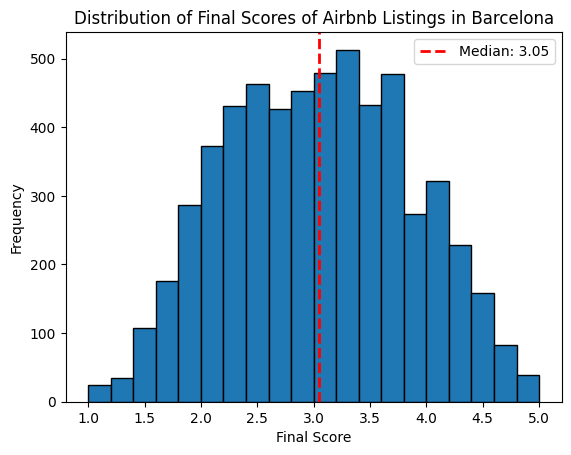

In [73]:
import matplotlib.pyplot as plt

# code to create the histogram
final_scores = result['final score']
plt.hist(final_scores, bins=20, edgecolor='k')  # You can adjust the number of bins
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores of Airbnb Listings in Barcelona')

# Calculate the median
median = final_scores.median()

# Add a vertical line for the median
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# Display the legend
plt.legend()

# Display the histogram
plt.show()